# Text Processing

In [49]:
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import nltk

In [50]:
df_tweet_id = pd.read_csv('../datasets/df_tweets_id.csv')
df_tweet_id.tail()

,Unnamed: 0,username,screen_name,user_location,user_verified,followers_count,friends_count,listed_count,tweet_created_at,tweet_text,tweet_coordinates,tweet_place,tweet_favorite_count
275,275,Nama tidak boleh kosong,kikoenaaktauu,"Bali, Indonesia",False,815,157,0,2020-12-11 06:19:47,@yaksat__ @TimpalBali Bali : Layah Basange,NaN,Place(_api=<tweepy.api.API object at 0x0000021...,0
276,276,PMJNEWS,pmjnews,NaN,False,137,639,0,2020-12-11 06:19:27,Masyarakat Indonesia tengah tergila-gila denga...,NaN,NaN,0
277,277,aytaa☾༉,ztctica,exol 614 hhs,False,1465,1331,3,2020-12-11 06:19:26,@channieyeoler_ bali,NaN,NaN,0
278,278,``Han °¹²²⁹,bloeto93,01l,False,585,780,0,2020-12-11 06:19:23,@tanyainrl Ini aksara bali? Apa jawa si🤧 weh i...,NaN,NaN,0
279,279,ฉันรักมิวกลัฟ💙 |||,ttlovemg,NaN,False,630,52,1,2020-12-11 06:18:50,RT @idntimes: Pet tembuh #MewSuppasit Mewlions...,NaN,NaN,0


In [51]:
tweets = df_tweet_id[['tweet_text']]
tweets.head()

,tweet_text
0,11/12 Kijang 6201 di Restaurant Amora situasi ...
1,"Sambut Wisatawan Domestik, #Bandara #NgurahRai..."
2,@wulandita_ Yoh ko nek bali tak tukokke
3,"@strobewime thankyou bby, congrats juga ya, si..."
4,"kabur ke bali bentar kali ya, haha"


## Data Cleaning

### 1. Menghilangkan tanda baca

We also need to carefully choose the list of punctuations to exclude depending on the use case. For example, the `string.punctuation` in python contains the following punctuation symbols

`!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

In [52]:
import re

def cleantext(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

tweets['tweet_wo_punc'] = tweets['tweet_text'].apply(cleantext)
tweets.head()

<ipython-input-52-93b507327504>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['tweet_wo_punc'] = tweets['tweet_text'].apply(cleantext)


,tweet_text,tweet_wo_punc
0,11/12 Kijang 6201 di Restaurant Amora situasi ...,11/12 Kijang 6201 di Restaurant Amora situasi ...
1,"Sambut Wisatawan Domestik, #Bandara #NgurahRai...","Sambut Wisatawan Domestik, Bandara NgurahRai B..."
2,@wulandita_ Yoh ko nek bali tak tukokke,_ Yoh ko nek bali tak tukokke
3,"@strobewime thankyou bby, congrats juga ya, si...","thankyou bby, congrats juga ya, sini nyari ke..."
4,"kabur ke bali bentar kali ya, haha","kabur ke bali bentar kali ya, haha"


### 1.2 Menghilangkan Stopwords (kata sambung)

In [53]:
# Stopwords from English language
from nltk.corpus import stopwords

', '.join(stopwords.words('indonesian'))

'ada, adalah, adanya, adapun, agak, agaknya, agar, akan, akankah, akhir, akhiri, akhirnya, aku, akulah, amat, amatlah, anda, andalah, antar, antara, antaranya, apa, apaan, apabila, apakah, apalagi, apatah, artinya, asal, asalkan, atas, atau, ataukah, ataupun, awal, awalnya, bagai, bagaikan, bagaimana, bagaimanakah, bagaimanapun, bagi, bagian, bahkan, bahwa, bahwasanya, baik, bakal, bakalan, balik, banyak, bapak, baru, bawah, beberapa, begini, beginian, beginikah, beginilah, begitu, begitukah, begitulah, begitupun, bekerja, belakang, belakangan, belum, belumlah, benar, benarkah, benarlah, berada, berakhir, berakhirlah, berakhirnya, berapa, berapakah, berapalah, berapapun, berarti, berawal, berbagai, berdatangan, beri, berikan, berikut, berikutnya, berjumlah, berkali-kali, berkata, berkehendak, berkeinginan, berkenaan, berlainan, berlalu, berlangsung, berlebihan, bermacam, bermacam-macam, bermaksud, bermula, bersama, bersama-sama, bersiap, bersiap-siap, bertanya, bertanya-tanya, berturut

In [54]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stopword_id = StopWordRemoverFactory().get_stop_words()
print(stopword_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [55]:
more_stopwords = ['kalau', 'kalo', 'klo', 'yg', 'pd', 'ntr', 'tp', 'di']
# Merge stopword
stopwords_data = stopword_id + more_stopword
stopwords_id_dictionary = ArrayDictionary(stopwords_data)
stopwords = StopWordRemover(stopwords_id_dictionary)

In [56]:
tweet_wo_stopwords = []
for text in tweets['tweet_wo_punc']:
    tweet_wo_stopwords.append(stopwords.remove(text))

tweets = tweets.assign(tweet_wo_stopwords=tweet_wo_stopwords)
tweets.head()

,tweet_text,tweet_wo_punc,tweet_wo_stopwords
0,11/12 Kijang 6201 di Restaurant Amora situasi ...,11/12 Kijang 6201 di Restaurant Amora situasi ...,11/12 Kijang 6201 Restaurant Amora situasi aru...
1,"Sambut Wisatawan Domestik, #Bandara #NgurahRai...","Sambut Wisatawan Domestik, Bandara NgurahRai B...","Sambut Wisatawan Domestik, Bandara NgurahRai B..."
2,@wulandita_ Yoh ko nek bali tak tukokke,_ Yoh ko nek bali tak tukokke,_ Yoh ko nek bali tak tukokke
3,"@strobewime thankyou bby, congrats juga ya, si...","thankyou bby, congrats juga ya, sini nyari ke...","thankyou bby, congrats ya, sini nyari kerja b..."
4,"kabur ke bali bentar kali ya, haha","kabur ke bali bentar kali ya, haha","kabur bali bentar kali ya, haha"


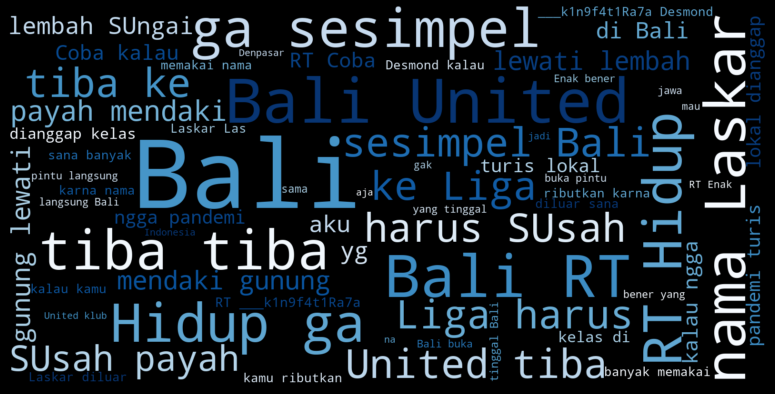

In [58]:
import matplotlib.pyplot as plt

allwords = ' '.join([text for text in tweets['tweet_wo_stopwords']])
wordcloud = WordCloud(colormap='Blues', 
                      width=1600, 
                      height=800,
                      random_state=30,
                      max_font_size=200,
                      min_font_size=20).generate(allwords)
plt.figure(figsize=(15, 7), facecolor='k')              
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()